<a href="https://colab.research.google.com/github/ellaclauz/EXAMPLES_KNEARESTNEIGHBORS/blob/main/Breast_Cancer_example_for_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Another example

Based on diagnosing breast cancer

About the data set: If a woman has a lump in her breast, the doctors may want to take a biopsy to see if it is cancerous. There are several different procedures for doing that. One such procedure is fine needle aspiration (FNA), which is less invasive than the alternatives. The doctor gets a sample of the mass, puts it under a microscope, takes a picture, and a trained lab tech analyzes the picture to determine whether it is cancer or not. 

The picture may look like one of the following:
- [picture of benign](https://drive.google.com/file/d/1XfMoroVdhu5kydKehIqlx56z9biwV_Fw/view?usp=share_link)
- [picture of malignant](https://drive.google.com/file/d/1nDacdN4Sn4qSgKmPZWlYC7Vb2sGvNpbq/view?usp=share_link)

Unfortunately, distinguishing between benign vs malignant can be tricky. So, researchers have studied the use of machine learning to help with this task. The idea is that the lab tech will be asked to analyze the image and compute various attributes: things like the typical size of a cell, how much variation there is among the cell sizes, and so on. Then, we’ll try to use this information to predict (classify) whether the sample is malignant or not. We have a dataset of past samples from women where the correct diagnosis is known, and we’ll hope that our machine learning algorithm can use those to learn how to predict the diagnosis for future samples.

In the "Class" column of the following dataset, 1 means malignant (cancer); 0 means benign (not cancer).

# Import Librabries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Data Loading

In [2]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [5]:
data = pd.read_csv('breast-cancer.csv')
data.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


# Exploratory Data Analysis

In [6]:
data.shape

(683, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   ID                           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [9]:
data["Class"].value_counts(normalize=True)

0    0.650073
1    0.349927
Name: Class, dtype: float64

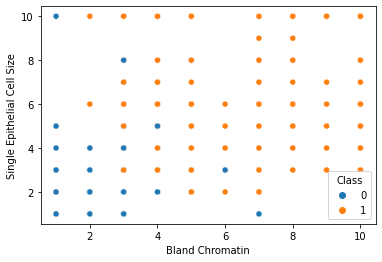

In [8]:
sns.scatterplot(x="Bland Chromatin", y="Single Epithelial Cell Size", data=data, hue="Class")
plt.show()

This plot is hard to decipher from, because there are a bunch of points that have identical values for both the x- and y-coordinates. To make it easier to see all the data points, we can add a little bit of random jitter to the x- and y-values. The process of jittering adds "noise" to the variables so that we can see the individual points on the plot more clearly.

Here's how that looks:

In [10]:
def rand_col(col):
    return col + np.random.normal(0.0, 0.09, size=len(col))

In [11]:
rand_col(data['Bland Chromatin'])

0      3.115827
1      2.920069
2      2.954361
3      2.987725
4      3.052288
         ...   
678    0.989097
679    1.004416
680    7.948180
681    9.888497
682    9.979045
Name: Bland Chromatin, Length: 683, dtype: float64

In [12]:
d = pd.DataFrame(data={'Bland Chromatin (jittered)':rand_col(data['Bland Chromatin']),
                       'Single Epithelial Cell Size (jittered)':rand_col(data['Single Epithelial Cell Size']),
                       'Class':data['Class']})

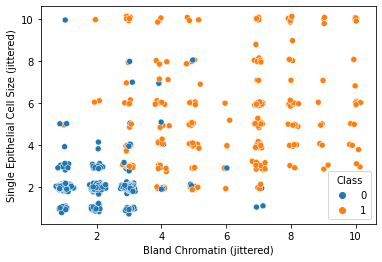

In [13]:
sns.scatterplot(x='Bland Chromatin (jittered)', y='Single Epithelial Cell Size (jittered)', data=d, hue="Class")
plt.show()

For instance, you can see there are lots of samples with chromatin = 2 and epithelial cell size = 2; all non-cancerous.

Keep in mind that the jittering is just for visualization purposes, to make it easier to get a feeling for the data. We're ready to work with the data now, and we'll use the original (unjittered) data.

## Training and Testing Split

### Isolate the `y` variable.
This is also known as the outcome variable / the target variable / the dependent variable. Essentially, this is the variable that you want to predict.

In [15]:
y = data["Class"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### Isolate the `X` variables.
Also known as the features / the independent variables. Essentially, these are the variables that you want to use to predict `y`.

In [17]:
X = data.drop(columns=["ID", "Class"])
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
dtypes: int64(9)
memory usage: 48.1 KB


In [19]:
X.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')

### Split `X` and `y` into training and testing sets.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

Check what the training and testing sets look like.

In [21]:
X_train.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
556,7,6,10,5,3,10,9,10,2
66,8,3,8,3,4,9,8,9,8
571,8,10,10,10,6,10,10,10,1
299,1,1,1,1,2,1,1,1,1
355,1,1,3,1,1,1,2,1,1


In [22]:
X_test.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
113,1,1,1,1,2,5,1,1,1
378,3,1,1,1,2,1,2,1,1
303,5,5,5,2,5,10,4,3,1
504,4,7,8,3,4,10,9,1,1
301,1,1,1,1,2,1,1,1,1


In [23]:
y_train.head()

556    1
66     1
571    1
299    0
355    0
Name: Class, dtype: int64

In [24]:
y_test.head()

113    0
378    0
303    1
504    1
301    0
Name: Class, dtype: int64

Check the shapes of the training and testing sets.

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((512, 9), (171, 9), (512,), (171,))

## Implement K-NN

### Create a `KNeighborsClassifier` object.

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)

### Fit the `KNeighborsClassifier` to the training data.

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Use the fitted `KNeighborsClassifier` to predict on the training set.

Get the predictions on the training set.

In [28]:
preds_train = knn.predict(X_train)

Check data types of the predictions and the true values for training set.

In [29]:
type(preds_train), type(y_train)

(numpy.ndarray, pandas.core.series.Series)

How to compare predictions to true values for training set:

In [30]:
preds_train == y_train

556    True
66     True
571    True
299    True
355    True
       ... 
9      True
359    True
192    True
629    True
559    True
Name: Class, Length: 512, dtype: bool

Compute accuracy of predictions for training set:

In [31]:
knn.score(X_train, y_train)

0.98046875

### Use the fitted `KNeighborsClassifier` to predict on the testing set.

Get the predictions on the testing set.

In [32]:
preds_test = knn.predict(X_test)

What do the predictions on the testing set look like:

In [33]:
preds_test

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

What do the true values in the testing set look like:

In [34]:
y_test

113    0
378    0
303    1
504    1
301    0
      ..
443    0
159    0
317    0
78     0
92     0
Name: Class, Length: 171, dtype: int64

Compute accuracy of predictions for testing set: 

In [35]:
knn.score(X_test, y_test)

0.9532163742690059